### Rock Paper Scissor Image Prediction

This project aims to predict Rock Paper Scissor image prediction based on image uploaded. This project also my submission for Dicoding Machine Learning course

In [ ]:
import os
import platform
import tensorflow as tf

In [ ]:
# set env for this project
%cd /content/drive/My Drive/Colab Notebooks/misc

/content/drive/My Drive/Colab Notebooks/misc


In [ ]:
# check correct env
!pwd

/content/drive/My Drive/Colab Notebooks/misc


In [ ]:
# checking version
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.6.9
Tensorflow version: 2.3.0
Keras version: 2.4.0


In [ ]:
# get file
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-11-07 21:41:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.77MB/s    in 73s     

2020-11-07 21:42:38 (4.23 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# unzip and del .zip
%%capture
!unzip \*.zip  && rm *.zip

In [ ]:
# checking dir
!dir rockpaperscissors/

paper  rock  rps-cv-images  scissors


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set val and train 40% value
# train must be 1314 images
# val must be 874 images

base_dir= 'rockpaperscissors/rps-cv-images/'

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    fill_mode='nearest',
    validation_split = 0.4) #set value 40%

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size=20,
    class_mode = 'categorical',o
    shuffle=True,
    subset='training') # split training data

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation') # split validation data

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), activation=tf.nn.relu,input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 146, 146, 64)      4864      
_________________________________________________________________
batch_normalization_3 (Batch (None, 146, 146, 64)      256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 144, 144, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 156800)           

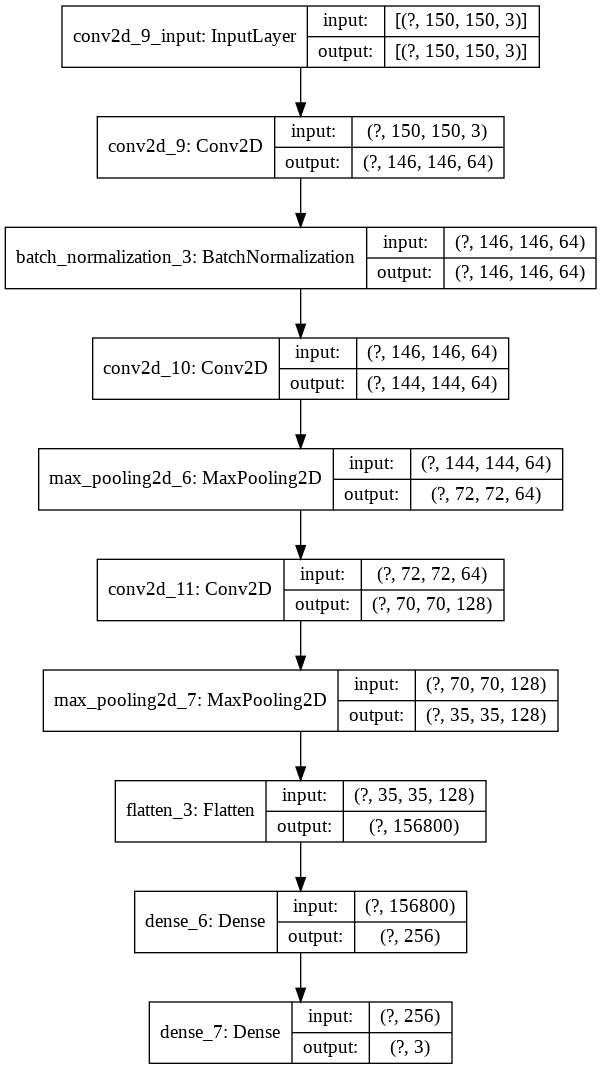

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [ ]:
%%time

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

history = model.fit(train_gen,
                    epochs = 5,
                    verbose = 1,
                    steps_per_epoch= 30,
                    validation_data = val_gen,
                    callbacks=[learning_rate_reduction])

Epoch 1/5
30/30 [==============================] - 174s 6s/step - loss: 0.1262 - acc: 0.9650 - val_loss: 0.2635 - val_acc: 0.9233
Epoch 2/5
30/30 [==============================] - ETA: 0s - loss: 0.1433 - acc: 0.9596
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
30/30 [==============================] - 173s 6s/step - loss: 0.1433 - acc: 0.9596 - val_loss: 1.6308 - val_acc: 0.6808
Epoch 3/5
30/30 [==============================] - 177s 6s/step - loss: 0.0996 - acc: 0.9781 - val_loss: 0.1534 - val_acc: 0.9565
Epoch 4/5
30/30 [==============================] - 174s 6s/step - loss: 0.0763 - acc: 0.9817 - val_loss: 0.1342 - val_acc: 0.9588
Epoch 5/5
30/30 [==============================] - ETA: 0s - loss: 0.0825 - acc: 0.9764
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
30/30 [==============================] - 173s 6s/step - loss: 0.0825 - acc: 0.9764 - val_loss: 0.3087 - val_acc: 0.9165
CPU times: user 28min 12s, sys: 13

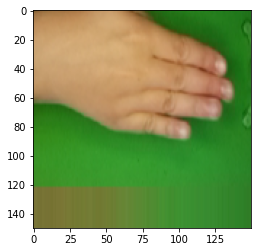

[1. 0. 0.]


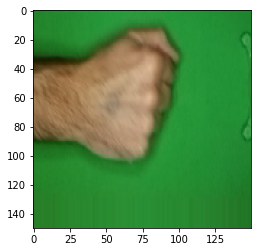

[0. 1. 0.]


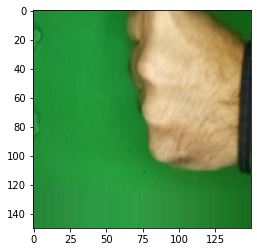

[0. 1. 0.]


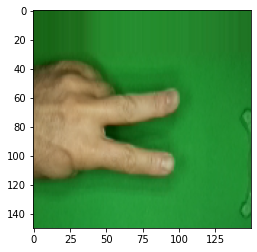

[0. 0. 1.]


In [ ]:
# print 4 images with the labels

import matplotlib.pyplot as plt

x, y = train_gen.next()
plt.imshow(x[0])
plt.show()
print(y[0])

plt.imshow(x[1])
plt.show()
print(y[1])

plt.imshow(x[2])
plt.show()
print(y[2])


plt.imshow(x[3])
plt.show()
print(y[3])

Saving e6O1EpJykTCPNfvI.png to e6O1EpJykTCPNfvI (9).png
e6O1EpJykTCPNfvI.png
scissors


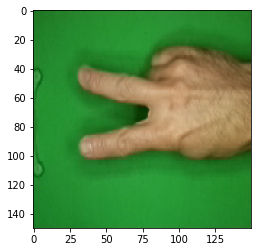

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
print(fn)
  
if classes[0,0]:
  print('scissors')
elif classes[0,1]:
  print('rock')
else:
  print('paper')